# DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION

# AUTHOR: SHIBBIR AHMED ARIF

# GRIP BATCH - JUNE 2021

# TASK-2: Prediction using Unsupervised Machine Learning

# OBJECTIVE: 

Predict on the optimum number of clusturs and present it virtually using given 'Iris' dataset

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Finding the optimum number of clusters for k-means classification

In [4]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 101)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the Results into One Line Graph

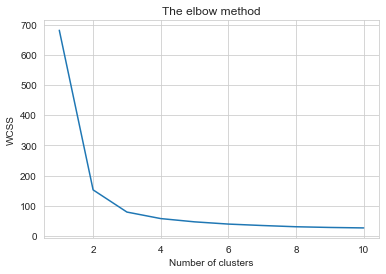

In [5]:
sns.set_style("whitegrid")
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Note: From above graph using elbow method we can find the optimum number of clusters.This is when the elbow occurs when within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Therefore,choosing number of clusters as "3"

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 101)
y_kmeans = kmeans.fit_predict(x)

# Visualization of The Clusters

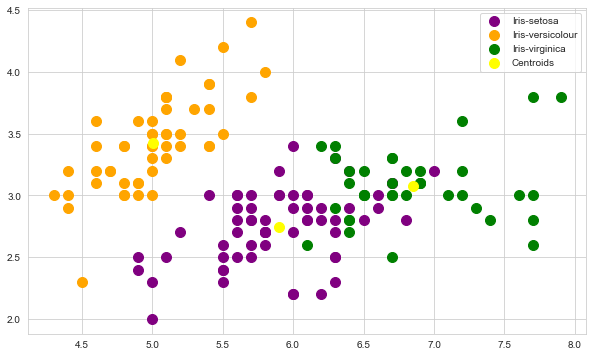

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Successfully Completed The Task